In [1]:
import numpy as np 
import pandas as pd 

import sys
sys.path.append('../')
from utils import funciones as f

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# word cloud library
# from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins
# import ipywidgets
# import geocoder 

import warnings
warnings.filterwarnings("ignore")

### Evolución de la vivienda en España en los últimos diez años

La preocupación por la vivienda se ha disparado en los últimos meses, colándose entre los principales problemas de España, según los encuestados del último barómetro del CIS.

Según los estudios que hace el Centro de Investigaciones Sociológicas (CIS) sobre los problemas que más preocupan a los españoles, la vivienda ha ido cogiendo peso desde el pasado diciembre y en el último barómetro, los españoles la colocaban entre los cinco principales problemas de España.

In [2]:
preocupacion_vivienda = pd.read_csv("../data/evolucion_de_la_preocupacion_por_la_vivienda,_segun_el_cis.csv", sep=';')
preocupacion_vivienda = preocupacion_vivienda[(preocupacion_vivienda['Año'] >= '2014') & (preocupacion_vivienda['Año'] <= '2023')]
preocupacion_vivienda.rename(columns={'% de españoles que sitúa la vivienda entre los principales problemas de España' : '% preocupación vivienda'}, inplace=True)
preocupacion_vivienda['% preocupación vivienda'] = preocupacion_vivienda['% preocupación vivienda'].str.replace(',','.').astype(float)
preocupacion_vivienda.head()

,Año,Periodo,% preocupación vivienda
153,2014,Enero,1.5
154,2014,Febrero,1.6
155,2014,Marzo,1.6
156,2014,Abril,1.7
157,2014,Mayo,1.3


In [3]:
preocupacion_economica = pd.read_csv("../data/evolucion_de_la_preocupacion_por_problemas_de_indole_economica.csv", sep=';')
preocupacion_economica = preocupacion_economica[(preocupacion_economica['Año'] >= '2014') & (preocupacion_economica['Año'] <= '2023')]
preocupacion_economica.rename(columns={'Problemas de índole económica' : '% preocupación económica'}, inplace=True)
preocupacion_economica['% preocupación económica'] = preocupacion_economica['% preocupación económica'].str.replace(',','.').astype(float)
preocupacion_economica

,Año,Periodo,% preocupación económica
167,2014,Enero,30.5
168,2014,Febrero,28.3
169,2014,Marzo,28.2
170,2014,Abril,28.0
171,2014,Mayo,28.6
...,...,...,...
270,2023,Junio,33.7
271,2023,Julio,36.6
272,2023,Septiembre,35.5
273,2023,Octubre,37.3


In [4]:
preocupacion_paro = pd.read_csv("../data/evolucion_de_la_preocupacion_por_el_paro_.csv", sep=';')
preocupacion_paro = preocupacion_paro[(preocupacion_paro['Año'] >= '2014') & (preocupacion_paro['Año'] <= '2023')]
preocupacion_paro.rename(columns={'Preocupación por el paro' : '% preocupación paro'}, inplace=True)
preocupacion_paro['% preocupación paro'] = preocupacion_paro['% preocupación paro'].str.replace(',','.').astype(float)
preocupacion_paro

,Año,Periodo,% preocupación paro
167,2014,Enero,78.5
168,2014,Febrero,81.1
169,2014,Marzo,82.3
170,2014,Abril,80.3
171,2014,Mayo,80.8
...,...,...,...
270,2023,Junio,33.5
271,2023,Julio,30.9
272,2023,Septiembre,27.9
273,2023,Octubre,25.6


In [5]:
preocupacion_sanidad = pd.read_csv("../data/evolucion_de_la_preocupacion_por_la_sanidad.csv", sep=';')
preocupacion_sanidad = preocupacion_sanidad[(preocupacion_sanidad['Año'] >= '2014') & (preocupacion_sanidad['Año'] <= '2023')]
preocupacion_sanidad.rename(columns={'% de cuestionarios del CIS que sitúan a la sanidad entre los principales problemas' : '% preocupación sanidad'}, inplace=True)
preocupacion_sanidad['% preocupación sanidad'] = preocupacion_sanidad['% preocupación sanidad'].str.replace(',','.').astype(float)
preocupacion_sanidad.head()

,Año,Periodo,% preocupación sanidad
148,2014,Enero,11.6
149,2014,Febrero,10.8
150,2014,Marzo,10.2
151,2014,Abril,10.4
152,2014,Mayo,10.4


In [6]:
preocupacion_corrupcion = pd.read_csv("../data/preocupacion_de_los_españoles_por_la_corrupcion.csv", sep=';')
preocupacion_corrupcion = preocupacion_corrupcion[(preocupacion_corrupcion['Año'] >= '2014') & (preocupacion_corrupcion['Año'] <= '2023')]
preocupacion_corrupcion.rename(columns={'La corrupción' : '% preocupación corrupción'}, inplace=True)
preocupacion_corrupcion['% preocupación corrupción'] = preocupacion_corrupcion['% preocupación corrupción'].str.replace(',','.').astype(float)
preocupacion_corrupcion.head()

,Año,Periodo,% preocupación corrupción
136,2014,Enero,39.5
137,2014,Febrero,44.2
138,2014,Marzo,41.0
139,2014,Abril,36.3
140,2014,Mayo,35.7


In [7]:
preocupacion = pd.DataFrame(preocupacion_vivienda.groupby('Año')['% preocupación vivienda'].mean().round(2))
preocupacion['% preocupación económica'] = preocupacion_economica.groupby('Año')['% preocupación económica'].mean().round(2)
preocupacion['% preocupación paro'] = preocupacion_paro.groupby('Año')['% preocupación paro'].mean().round(2)
preocupacion['% preocupación sanidad'] = preocupacion_sanidad.groupby('Año')['% preocupación sanidad'].mean().round(2)
preocupacion['% preocupación corrupción'] = preocupacion_corrupcion.groupby('Año')['% preocupación corrupción'].mean().round(2)
preocupacion

,% preocupación vivienda,% preocupación económica,% preocupación paro,% preocupación sanidad,% preocupación corrupción
Año,,,,,
2014,1.43,27.84,78.24,10.79,44.16
2015,1.81,25.01,79.20,11.49,45.71
2016,1.47,24.27,75.38,11.35,41.86
2017,1.51,22.54,69.84,10.79,39.65
2018,2.09,21.54,62.88,10.91,34.90
2019,2.95,26.26,60.38,15.37,25.00
2020,1.32,34.80,39.21,17.69,9.52
2021,1.62,40.70,37.11,15.66,4.01
2022,2.70,41.73,33.62,19.52,5.10


In [8]:

trace1 = go.Scatter(
                    x = preocupacion.index,
                    y = preocupacion['% preocupación económica'],
                    name = 'preocupacion por la economía',
                    mode= 'lines',
                    marker = dict(color = '#ebd234'),
                    text = '% preocupacion')

trace2 = go.Scatter(
                    x = preocupacion.index,
                    y = preocupacion['% preocupación paro'],
                    name = 'preocupacion por el paro',
                    mode= 'lines',
                    marker = dict(color = '#98eb34'),
                    text = '% preocupacion')

trace3 = go.Scatter(
                    x = preocupacion.index,
                    y = preocupacion['% preocupación sanidad'],
                    name = 'preocupacion por la sanidad',
                    mode= 'lines',
                    marker = dict(color = '#34eb7d'),
                    text = '% preocupacion')

trace4 = go.Scatter(
                    x = preocupacion.index,
                    y = preocupacion['% preocupación corrupción'],
                    name = 'preocupacion por la corrupción',
                    mode= 'lines',
                    marker = dict(color = '#34aeeb'),
                    text = '% preocupacion')

trace5 = go.Scatter(
                    x = preocupacion.index,
                    y = preocupacion['% preocupación vivienda'],
                    name = 'preocupacion por la vivienda',
                    mode= 'lines',
                    marker = dict(color = '#eb344c'),
                    text = '% preocupacion')


data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Evolución de los principales problemas de España ',
             xaxis= dict(title= 'Años',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)
fig.write_html("Evolución de los principales problemas de España.html")

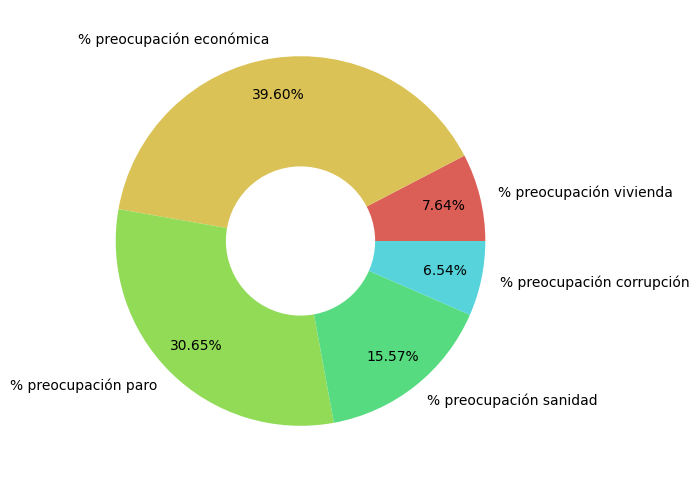

In [9]:
my_circle=plt.Circle( (0,0),
                     0.4, # Grosor del donut
                     color='white')

plt.figure(figsize=(6,6))

plt.pie(preocupacion.iloc[9,:].values,
        labels=preocupacion.columns,
        autopct='%1.2f%%',
        pctdistance = 0.8,
        colors= sns.color_palette("hls", 8));

p=plt.gcf()
p.gca().add_artist(my_circle);

In [10]:
preocupacion_viv = pd.read_csv("../data/evolucion_de_la_preocupacion_por_la_vivienda,_segun_el_cis.csv", sep=';')
preocupacion_viv.rename(columns={'% de españoles que sitúa la vivienda entre los principales problemas de España' : '% preocupación vivienda'}, inplace=True)
preocupacion_viv['Periodo'] = preocupacion_viv['Año'] + ' ' + preocupacion_viv['Periodo']
preocupacion_viv.drop(columns=['Año'], inplace=True)
preocupacion_viv['% preocupación vivienda'] = preocupacion_viv['% preocupación vivienda'].str.replace(',','.').astype(float)
preocupacion_viv.head()

,Periodo,% preocupación vivienda
0,1985 Mayo,2.1
1,1985 Octubre,2.2
2,1986 Septiembre,3.2
3,1986 Diciembre,1.9
4,1988 Junio,1.7


In [11]:
trace1 = go.Scatter(
                    x = preocupacion_viv['Periodo'],
                    y = preocupacion_viv['% preocupación vivienda'],
                    name = 'preocupacion por la vivienda',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = '% preocupacion')


data = [trace1]

layout = dict(title = 'Evolución de la preocupación por la vivienda en España',
             xaxis= dict(title= 'Evolución por meses',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)
fig.write_html("Evolución de la preocupación por la vivienda en España.html")

# Hipótesis1
### Bajos salarios y subida de los alquileres impiden la emancipación de los jóvenes

Los jóvenes tienen grandes dificultades para poder acceder a una vivienda en todo el Estado, hasta el punto que solo un 16,6% de los de entre 18 y 29 años están emancipados, según el Observatorio de Emancipación del Consejo de la Juventud de España. El alto precio de los alquileres, la precariedad laboral y sueldos que no alcanzan los 20.000 euros brutos de media al año, comportan que no puedan independizarse o se vean obligados a compartir un piso. 

In [12]:
injuve_diez_años = f.injuve_diez_años('2014.1T EPA','2014.2T EPA','2014.3T EPA','2014.4T EPA','2015.1T EPA','2015.2T EPA','2015.3T EPA','2015.4T EPA',
                                      '2016.1T EPA','2016.2T EPA','2016.3T EPA','2016.4T EPA','2017.1T EPA','2017.2T EPA','2017.3T EPA','2017.4T EPA',
                                      '2018.1T EPA','2018.2T EPA','2018.3T EPA','2018.4T EPA','2019.1T EPA','2019.2T EPA','2019.3T EPA','2019.4T EPA',
                                      '2020.1T EPA','2020.2T EPA','2020.3T EPA','2020.4T EPA','2021.1T EPA','2021.2T EPA','2021.3T EPA','2021.4T EPA',
                                      '2022.1T EPA','2022.2T EPA','2022.3T EPA','2022.4T EPA','2023.1T EPA','2023.2T EPA','2023.3T EPA','2023.4T EPA')

In [13]:
injuve_diez_años

,1º trim 2014,2º trim 2014,3º trim 2014,4º trim 2014,1º trim 2015,2º trim 2015,3º trim 2015,4º trim 2015,1º trim 2016,2º trim 2016,...,3º trim 2021,4º trim 2021,1º trim 2022,2º trim 2022,3º trim 2022,4º trim 2022,1º trim 2023,2º trim 2024,3º trim 2023,4º trim 2023
JÓVENES DE 16 A 29 AÑOS EN LA EPA,,,,,,,,,,,,,,,,,,,,,
Tasa de jóvenes (%) s/Tot16y+años,17.58,17.47,17.37,17.30,17.23,17.17,17.11,17.02,16.97,16.93,...,17.22,17.22,17.26,17.31,17.40,17.49,17.54,17.55,17.65,17.78
Tasa de Emancipación (%),23.78,23.88,23.36,23.07,22.98,22.36,22.02,22.10,22.05,21.33,...,15.91,17.18,17.14,17.91,17.24,17.79,18.13,18.31,18.21,18.73
Tasa de Actividad (%),58.14,58.16,59.33,57.95,56.79,57.03,58.35,55.86,54.90,55.73,...,55.84,52.37,52.71,54.25,55.26,52.66,52.50,54.20,56.32,53.82
Tasa de Inactividad (%),41.86,41.84,40.67,42.05,43.21,42.97,41.65,44.14,45.10,44.27,...,44.16,47.63,47.29,45.75,44.74,47.34,47.50,45.80,43.68,46.18
Tasa de Empleo (%),33.76,35.27,36.42,35.51,34.79,35.92,37.42,36.23,35.32,36.56,...,41.63,40.00,40.42,43.11,42.36,40.95,40.63,43.31,44.37,42.43


In [14]:

# trace1 = go.Scatter(
#                     x = injuve_diez_años.columns,
#                     y = injuve_diez_años.iloc[0,:],
#                     name = 'Tasa de jóvenes (%)',
#                     mode= 'lines',
#                     marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
#                     text = '% jóvenes')

trace2 = go.Scatter(
                    x = injuve_diez_años.columns,
                    y = injuve_diez_años.iloc[1,:],
                    name = 'Tasa de Emancipación (%',
                    mode= 'lines',
                    marker = dict(color = 'rgb(250, 124, 163)'),
                    text = '% emancipación')

trace3 = go.Scatter(
                    x = injuve_diez_años.columns,
                    y = injuve_diez_años.iloc[4,:],
                    name = 'Tasa de Empleo (%)',
                    mode= 'lines',
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = '% empleo')

data = [trace2, trace3]

layout = dict(title = 'Jóvenes de 16 a 29 años en la EPA (Edad de Población Activa)',
             xaxis= dict(title= 'Años',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)
fig.write_html("Jóvenes de 16 a 29 años en la EPA.html")

In [15]:
precios_alquiler = f.precios_alquiler('histórico_alquiler_españa')
precios_alquiler = precios_alquiler.set_index('Año')
precios_alquiler

,Precio m2,Variación mensual,Variación trimestral,Variación anual
Año,,,,
2014,7.17,0.05,0.15,-0.73
2015,7.39,0.18,0.70,2.80
2016,7.84,0.87,2.27,6.13
2017,8.75,0.97,2.81,11.75
2018,9.80,0.72,2.42,11.83
2019,10.25,0.32,0.94,4.68
2020,10.73,0.26,1.05,4.83
2021,10.42,-0.33,-1.13,-2.94
2022,10.71,0.59,1.56,2.93


In [16]:
trace1 = go.Scatter(
                    x = precios_alquiler.index,
                    y = precios_alquiler['Precio m2'],
                    name = 'Precio €/m2',
                    mode= 'lines',
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = 'Evolución precios alquiler')

data = [trace1]

layout = dict(title = 'Evolución precios alquiler',
             xaxis= dict(title= 'Años',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [17]:
distribuion_salarial = (f.distribucion_salarial('mediana','percentil_10','cuartil_inf','sueldo_medio','cuartil_sup','percentil_90'))[::-1]
distribuion_salarial = distribuion_salarial.set_index('Periodo').T
distribuion_salarial

Periodo,2014,2015,2016,2017,2018,2019,2020,2021
mediana,19263.78,19466.49,19432.62,19830.12,20078.44,20351.02,20920.12,21638.69
percentil_10,7626.20,7962.45,8095.44,8583.81,8457.36,8943.26,9586.51,10192.38
cuartil_inf,13217.84,13414.92,13369.74,13897.22,13998.29,14271.06,14641.96,15215.03
sueldo_medio,22858.17,23106.30,23156.34,23646.50,24009.12,24395.98,25165.51,25896.82
cuartil_sup,28782.70,29163.66,29191.56,29628.64,30057.33,30558.45,31550.01,32385.45
percentil_90,41350.36,41648.67,41855.38,42454.21,43382.16,44127.12,45359.96,46430.36


En 2022, los sueldos subieron en España un 4,6% de media respecto al año anterior, prácticamente la mitad de lo que lo hicieron los precios, ya que la inflación promedio del pasado ejercicio fue del 8,4% internual. 

El salario medio en España crece un 5,4% anual y se sitúa en los 1.920 euros mensuales en 2023, según Adecco

In [18]:
distribuion_salarial[2022] = round((distribuion_salarial[2021] * 1.046), 2)
distribuion_salarial[2023] = round((distribuion_salarial[2022] * 1.054), 2)
distribuion_salarial = distribuion_salarial.T
distribuion_salarial

,mediana,percentil_10,cuartil_inf,sueldo_medio,cuartil_sup,percentil_90
Periodo,,,,,,
2014,19263.78,7626.20,13217.84,22858.17,28782.70,41350.36
2015,19466.49,7962.45,13414.92,23106.30,29163.66,41648.67
2016,19432.62,8095.44,13369.74,23156.34,29191.56,41855.38
2017,19830.12,8583.81,13897.22,23646.50,29628.64,42454.21
2018,20078.44,8457.36,13998.29,24009.12,30057.33,43382.16
2019,20351.02,8943.26,14271.06,24395.98,30558.45,44127.12
2020,20920.12,9586.51,14641.96,25165.51,31550.01,45359.96
2021,21638.69,10192.38,15215.03,25896.82,32385.45,46430.36
2022,22634.07,10661.23,15914.92,27088.07,33875.18,48566.16


In [19]:
trace1 = go.Scatter(
                    x = distribuion_salarial.index,
                    y = distribuion_salarial['mediana'],
                    name = 'Salario anual más común',
                    mode= 'lines',
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = distribuion_salarial.index)

data = [trace1]

layout = dict(title = 'Evolución salario',
             xaxis= dict(title= 'Años',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [20]:
salario_mediana = round((distribuion_salarial['mediana']/12),2)
salario_mediana = pd.DataFrame(salario_mediana)
salario_mediana

,mediana
Periodo,
2014,1605.31
2015,1622.21
2016,1619.38
2017,1652.51
2018,1673.20
2019,1695.92
2020,1743.34
2021,1803.22
2022,1886.17


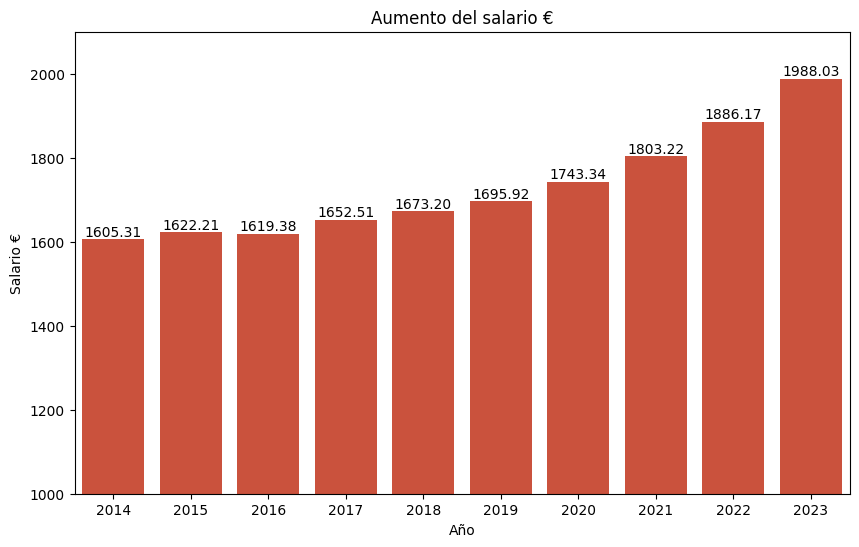

In [21]:

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=salario_mediana.index, y=salario_mediana['mediana'], data=salario_mediana, color='#e24125')
for i, value in enumerate(salario_mediana['mediana']):
    barplot.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
barplot.set(xlabel='Año', ylabel='Salario €', title='Aumento del salario €', ylim=(1000,2100))

plt.show()

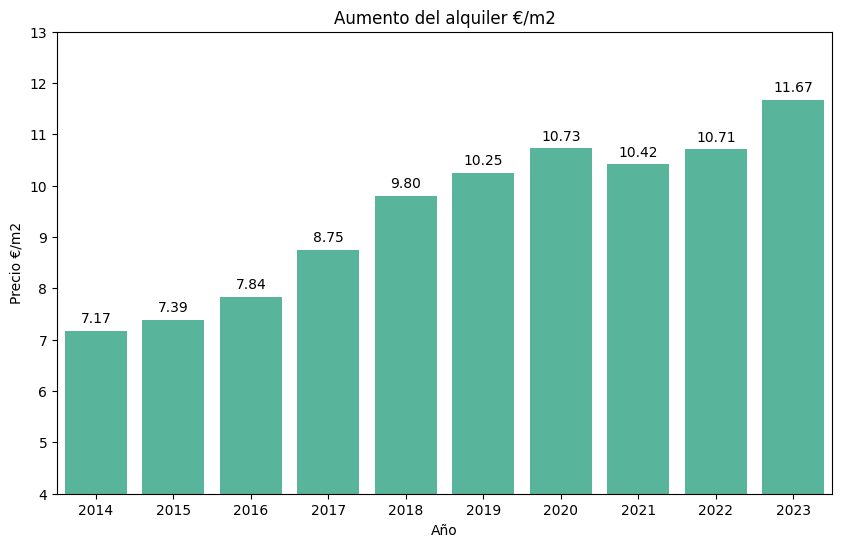

In [22]:

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=precios_alquiler.index, y=precios_alquiler['Precio m2'], data=precios_alquiler, color='#49c3a0')
for i, value in enumerate(precios_alquiler['Precio m2']):
    barplot.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
barplot.set(xlabel='Año', ylabel='Precio €/m2', title='Aumento del alquiler €/m2',ylim=(4,13))
plt.show()



In [23]:
variacion_salario_ipc = f.variacion_salario_ipc('variacion_anual_del_salario_bruto_medio_frente_a_la_variacion_anual_del_ipc_en_españa').T
variacion_salario_ipc[2023] = [3.1, 5.2]
variacion_salario_ipc = variacion_salario_ipc.T

In [24]:
salario_ipc_alquiler = variacion_salario_ipc.merge(precios_alquiler['Variación anual'], how="outer", left_index=True, right_index=True)
salario_ipc_alquiler.rename(columns={'Variación anual': 'Alquiler'}, inplace=True)
salario_ipc_alquiler

,IPC,Salarios,Alquiler
Año,,,
2014,-0.2,-0.21,-0.73
2015,-0.5,1.08,2.80
2016,-0.2,-0.32,6.13
2017,2.0,0.13,11.75
2018,1.7,0.86,11.83
2019,0.7,1.94,4.68
2020,-0.3,-2.61,4.83
2021,3.1,6.18,-2.94
2022,5.7,4.60,2.93


In [25]:

x = salario_ipc_alquiler.index

trace1 = {
    'x': x,
    'y': salario_ipc_alquiler['IPC'],
    'name': 'IPC',
    'type': 'bar'
}

trace2 = {
    'x': x,
    'y': salario_ipc_alquiler['Salarios'],
    'name': 'Salarios',
    'type': 'bar'
}

trace3 = {
    'x': x,
    'y': salario_ipc_alquiler['Alquiler'],
    'name': 'Alquiler',
    'type': 'bar'
}

data = [trace1, trace2, trace3]

layout = {
    'xaxis': {'title': 'Años'},
    'barmode': 'group',
    'title': 'Evolución IPC, salarios y alquiler'
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)
fig.write_html("Evolución IPC, salarios, alquiler.html")

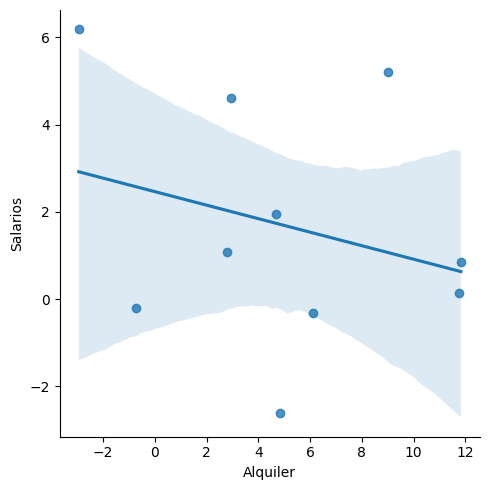

In [26]:
sns.lmplot(salario_ipc_alquiler, x='Alquiler', y='Salarios');

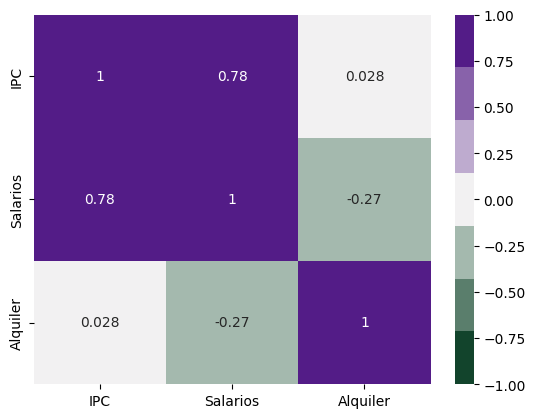

In [27]:
sns.heatmap(salario_ipc_alquiler.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7));

In [28]:
# import figure factory
import plotly.figure_factory as ff


# scatter matrix
fig = ff.create_scatterplotmatrix(salario_ipc_alquiler,
                                 diag = 'box',
                                #  index = salario_ipc_alquiler['Alquiler'],
                                 colormap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
                                 height = 700,
                                 width = 700)


iplot(fig)
fig.write_html("Scatterplot ipc, alquiler, salario.html")

# Hipótesis2

### El aumento de viviendas turísticas incide en el precio de los alquileres

Los pisos turísticos presionan los precios del alquiler con localidades donde son el 20% de las viviendas 

In [29]:
oferta_vut = pd.read_csv(('../data/'+ '1T 2023  Evolución de la oferta de viviendas turísticas' + '.csv'))
oferta_vut

,Fecha,España,Portugal,Italia
0,1T 2019,316998,85187,404659
1,2T 2019,372174,96173,489329
2,3T 2019,400830,102779,529245
3,4T 2019,354919,93584,472760
4,1T 2020,332100,90344,411419
5,2T 2020,335188,89254,420884
6,3T 2020,342866,91361,423866
7,4T 2020,307107,81661,368720
8,1T 2021,288028,76817,336639
9,2T 2021,317741,83037,385526


In [30]:
ocupacion_precios_vut = pd.read_csv(('../data/'+ '1T 2023  Nivel de ocupación y precios medios de las viviendas turísticas en alquiler' + '.csv'))
ocupacion_precios_vut

,Países,Ocupación 1T 2023,precio medio por noche
0,ESP,"51,4","164,05"
1,ITA,"48,7","171,39"
2,PRT,"54,8","135,77"


In [31]:
crecimiento_vut = f.vut('crecimiento_vivienda_turistica_españa')
crecimiento_vut.head()

,2020,2021,2022,2023,Var.2022/2023(%)
CIUDADES,,,,,
Madrid,21233,15788,14906,19406,30.2
Barcelona,23446,15211,13001,14531,11.8
Valencia,7946,6206,5885,7609,29.3
Málaga,6986,5749,6008,7545,23.9
Sevilla,7679,5899,6002,7247,20.3


(0.0, 60.0)

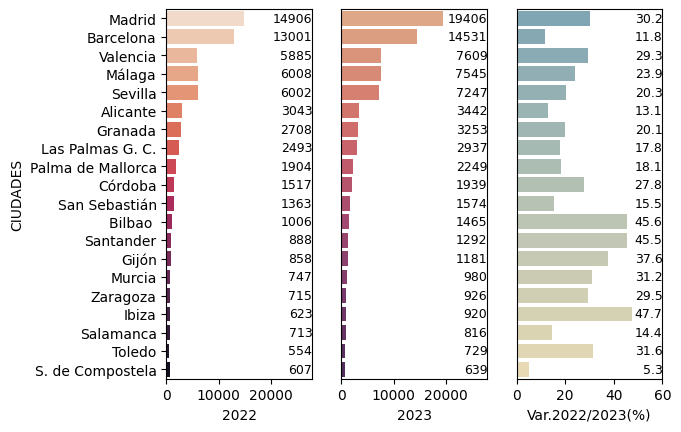

In [32]:

plt.subplot(1, 3, 1) 
sns.barplot(x = crecimiento_vut.iloc[0:20,:]['2022'], y = crecimiento_vut.iloc[0:20,:].index, palette="rocket_r")
for i, value in enumerate(crecimiento_vut.iloc[0:20,:]['2022']):
    plt.text(28000,i,value,fontsize=9,ha='right',va='center')
plt.xlim(0, 28000) 


plt.subplot(1, 3, 2) 
sns.barplot(x = crecimiento_vut.iloc[0:20,:]['2023'], y = crecimiento_vut.iloc[0:20,:].index, palette="flare")
for i, value in enumerate(crecimiento_vut.iloc[0:20,:]['2023']):
    plt.text(28000,i,value,fontsize=9,ha='right',va='center')
plt.yticks([]) 
plt.ylabel('')
plt.xlim(0, 28000) 


plt.subplot(1, 3, 3) 
sns.barplot(x = crecimiento_vut.iloc[0:20,:]['Var.2022/2023(%)'], y = crecimiento_vut.iloc[0:20,:].index, palette="blend:#7AB,#EDA")
for i, value in enumerate(crecimiento_vut.iloc[0:20,:]['Var.2022/2023(%)']):
    plt.text(60,i,value,fontsize=9,ha='right',va='center')
plt.yticks([]) 
plt.ylabel('')
plt.xlim(0, 60) 


In [33]:
ipap = f.ipap('Índice de Precios de Apartamentos Turísticos, Total apartamentos, Tipo de dato')
ipap

,Índice,Tasa de variación interanual
Periodo,,
2014M01,104.43,-0.43
2014M02,108.51,1.27
2014M03,104.48,0.93
2014M04,110.64,4.92
2014M05,112.48,3.77
...,...,...
2023M08,196.86,4.62
2023M09,169.40,8.40
2023M10,155.84,8.41


In [34]:
alq_mad = f.alq_madrid('histórico_alquiler_madrid')
alq_mad


,Precio m2,Variación mensual,Variación trimestral,Variación anual
Mes,,,,
ene-14,11.1,0.2,-1.2,-2.3
feb-14,11.2,0.5,0.0,-1.6
mar-14,11.2,0.0,0.7,-1.0
abr-14,11.2,0.2,0.7,-0.6
may-14,11.2,0.2,0.4,0.3
...,...,...,...,...
ago-23,17.4,2.1,5.0,10.9
sep-23,17.7,1.3,5.1,10.7
oct-23,17.8,0.8,4.2,11.6


In [35]:
ipap.index = alq_mad.index
ipap

,Índice,Tasa de variación interanual
Mes,,
ene-14,104.43,-0.43
feb-14,108.51,1.27
mar-14,104.48,0.93
abr-14,110.64,4.92
may-14,112.48,3.77
...,...,...
ago-23,196.86,4.62
sep-23,169.40,8.40
oct-23,155.84,8.41


In [36]:
alq_ipap = pd.concat([alq_mad,ipap], axis=1)
alq_ipap= alq_ipap.rename(columns={'Precio m2':'alquiler €/m2',
                                   'Variación mensual':'alquiler_var_mensual',
                                   'Variación anual':'alquiler_var_anual',
                                   'Índice':'vut_índice',
                                   'Tasa de variación interanual':'vut_var_anual'})
alq_ipap = alq_ipap.drop(columns='Variación trimestral')
alq_ipap

,alquiler €/m2,alquiler_var_mensual,alquiler_var_anual,vut_índice,vut_var_anual
Mes,,,,,
ene-14,11.1,0.2,-2.3,104.43,-0.43
feb-14,11.2,0.5,-1.6,108.51,1.27
mar-14,11.2,0.0,-1.0,104.48,0.93
abr-14,11.2,0.2,-0.6,110.64,4.92
may-14,11.2,0.2,0.3,112.48,3.77
...,...,...,...,...,...
ago-23,17.4,2.1,10.9,196.86,4.62
sep-23,17.7,1.3,10.7,169.40,8.40
oct-23,17.8,0.8,11.6,155.84,8.41


In [37]:
alq_ipap.corr()

,alquiler €/m2,alquiler_var_mensual,alquiler_var_anual,vut_índice,vut_var_anual
alquiler €/m2,1.000000,0.046730,0.247236,0.629440,-0.015300
alquiler_var_mensual,0.046730,1.000000,0.479293,0.335785,0.487541
alquiler_var_anual,0.247236,0.479293,1.000000,0.267118,0.350836
vut_índice,0.629440,0.335785,0.267118,1.000000,0.340298
vut_var_anual,-0.015300,0.487541,0.350836,0.340298,1.000000


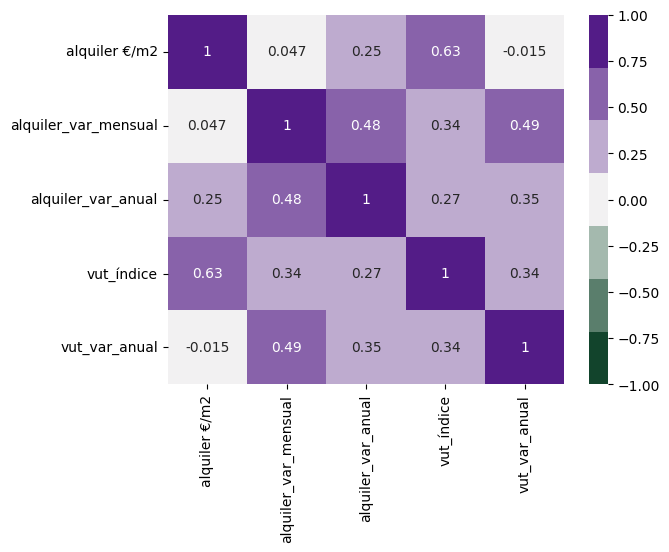

In [38]:
sns.heatmap(alq_ipap.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7));

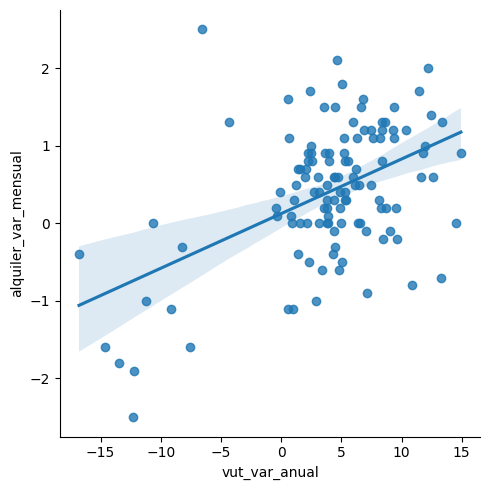

In [39]:
sns.lmplot(alq_ipap, x='vut_var_anual', y='alquiler_var_mensual');

In [40]:
alq_ipap.head()

,alquiler €/m2,alquiler_var_mensual,alquiler_var_anual,vut_índice,vut_var_anual
Mes,,,,,
ene-14,11.1,0.2,-2.3,104.43,-0.43
feb-14,11.2,0.5,-1.6,108.51,1.27
mar-14,11.2,0.0,-1.0,104.48,0.93
abr-14,11.2,0.2,-0.6,110.64,4.92
may-14,11.2,0.2,0.3,112.48,3.77


In [41]:
trace1 = go.Scatter(
                    x = alq_ipap.index,
                    y = alq_ipap['alquiler €/m2'],
                    name = 'alquiler €/m2',
                    mode= 'lines',
                    marker = dict(color = '#df0c7e'),
                    text = 'alquiler €/m2')

trace2 = go.Scatter(
                    x = alq_ipap.index,
                    y = alq_ipap['alquiler_var_mensual'],
                    name = 'Variación anual alquiler (%)',
                    mode= 'lines',
                    marker = dict(color = ' #860a88 '),
                    text = 'Variación anual alquiler (%)')

trace3 = go.Scatter(
                    x = alq_ipap.index,
                    y = alq_ipap['vut_índice'],
                    name = 'Índice precio VUT',
                    mode= 'lines',
                    marker = dict(color = ' #0c6bdf '),
                    text = 'precio VUT')

trace4 = go.Scatter(
                    x = alq_ipap.index,
                    y = alq_ipap['vut_var_anual'],
                    name = 'Variación anual índice VUT (%)',
                    mode= 'lines',
                    marker = dict(color = ' #0a6a88 '),
                    text = 'Variación anual índice VUT (%)')

data = [trace1, trace2, trace3, trace4]

layout = dict(title = 'Evolución precio alquiler-airbnb',
             xaxis= dict(title= 'Años',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)
fig.write_html("Evolución precio alquiler-airbnb.html")

In [48]:
airbnb_mad = pd.read_csv('../data/listings_insideairbnb_mad_dic23.csv')
airbnb_mad


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,85.0,5,106,2023-10-16,0.63,1,22,4,NaN
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Dana,Centro,Sol,40.414760,-3.704180,Entire home/apt,65.0,5,172,2022-09-26,1.05,3,0,0,NaN
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Abdel,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,33,2018-07-15,0.30,2,135,0,NaN
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.421830,-3.705290,Entire home/apt,94.0,5,33,2023-11-06,0.30,1,168,8,NaN
4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,132883,Angela,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,NaN,3,8,2017-05-30,0.08,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25538,1046219783290634155,Rental unit in Madrid · ★New · 2 bedrooms · 3 ...,529402573,Sara,Usera,Zofío,40.384658,-3.714106,Entire home/apt,120.0,1,0,NaN,NaN,56,303,0,NaN
25539,1045519419976898566,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,529402573,Sara,Salamanca,Guindalera,40.438832,-3.671323,Entire home/apt,120.0,1,0,NaN,NaN,56,189,0,NaN
25540,1046222300986271054,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,31772865,CituSpace,Tetuán,Castillejos,40.458234,-3.695566,Entire home/apt,171.0,1,0,NaN,NaN,42,318,0,NaN
25541,1046239141714406672,Rental unit in Madrid · ★New · 2 bedrooms · 4 ...,346367515,Ukio,Chamberí,Arapiles,40.433040,-3.711060,Entire home/apt,74.0,31,0,NaN,NaN,237,326,0,NaN


In [49]:
airbnb_bcn = pd.read_csv('../data/listings_insidearibnb_bcn_dic23.csv')
airbnb_bcn


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.170440,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.214870,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,1042002618810922779,Rental unit in Barcelona · ★New · 2 bedrooms ·...,3556337,Alejandro,Eixample,l'Antiga Esquerra de l'Eixample,41.388694,2.162324,Entire home/apt,143.0,1,0,NaN,NaN,51,364,0,HUTB-007296
18317,1042044489456901435,Rental unit in Barcelona · ★New · 3 bedrooms ·...,93833963,Maria,Horta-Guinardó,el Guinardó,41.422690,2.176110,Private room,96.0,32,0,NaN,NaN,6,268,0,Exempt
18318,1042051147106602685,Rental unit in Barcelona · ★New · 2 bedrooms ·...,66296022,Toni,Ciutat Vella,la Barceloneta,41.380426,2.191397,Entire home/apt,75.0,32,0,NaN,NaN,12,364,0,NaN
18319,1042053373256947884,Rental unit in Barcelona · ★New · 1 bedroom · ...,478007968,Morge,Eixample,la Sagrada Família,41.401691,2.176437,Private room,70.0,2,0,NaN,NaN,23,266,0,HUTB-784673


In [53]:
airbnb_sevilla= pd.read_csv('../data/listings_insideairbnb_sevilla_dic23.csv')
airbnb_sevilla

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,561654306981369438,Vacation home in Sevilla · ★4.69 · 1 bedroom ·...,209748933,Mariano,Triana,Triana Oeste,37.389172,-6.009562,Entire home/apt,281.0,1,16,2023-11-13,0.78,44,87,9,VFT/SE/04999
1,15479525,Home in Sevilla · ★4.63 · 2 bedrooms · 7 beds ...,99370256,Mi Casa,Casco Antiguo,Alfalfa,37.389670,-5.995620,Entire home/apt,484.0,2,119,2023-12-03,1.36,5,288,15,VFT/SE/00873
2,12785235,Rental unit in Sevilla · 1 bedroom · 1 bed · 1...,7080099,Alvaro,Sur,"Tiro de Línea, Santa Genoveva",37.370020,-5.977260,Private room,66.0,61,0,NaN,NaN,4,90,0,NaN
3,914985505906780237,Rental unit in Sevilla · ★4.90 · 1 bedroom · 2...,504269030,Rafael,Casco Antiguo,San Vicente,37.396814,-5.999763,Entire home/apt,93.0,2,10,2023-12-23,1.79,5,328,10,A/SE/00432
4,686891099292953953,Rental unit in Sevilla · 2 bedrooms · 4 beds ·...,473481460,Andres,Triana,Triana Casco Antiguo,37.386195,-6.004393,Entire home/apt,700.0,3,1,2023-03-23,0.11,1,7,1,VFT/SE/02161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7153,612380182531669737,Rental unit in Sevilla · 3 bedrooms · 1 bed · ...,85626203,Mane,Palmera - Bellavista,Bellavista,37.316680,-5.969120,Private room,33.0,3,1,2022-09-05,0.06,1,60,0,Exempt
7154,39672267,Rental unit in Sevilla · ★4.84 · 1 bedroom · 2...,304903777,Unico,Casco Antiguo,Santa Cruz,37.382350,-5.990310,Entire home/apt,97.0,2,73,2023-11-24,1.44,2,190,12,CTC-2019148934
7155,25470672,Rental unit in Sevilla · ★4.60 · 2 bedrooms · ...,860055,Maria,Casco Antiguo,San Bartolomé,37.387660,-5.989010,Entire home/apt,172.0,3,68,2023-10-03,1.02,27,294,5,Exempt
7156,44056900,Hostel in Sevilla · 2 bedrooms · 4 beds · 1 pr...,344783641,Pensión La Montoreña,Casco Antiguo,San Bartolomé,37.387870,-5.985330,Private room,502.0,1,0,NaN,NaN,34,52,0,H/SE-0114


In [ ]:
airbnb_sevilla= pd.read_csv('../data/listings_insideairbnb_sevilla_dic23.csv')
airbnb_sevilla

In [43]:
map_cities = f.mapas_airbnb('listings_insideairbnb_mad_dic23',40.41831,-3.70275)
map_cities.save('mapa_madrid_airbnb.html')

In [44]:
map_cities = f.mapas_airbnb('listings_insidearibnb_bcn_dic23',41.38879,2.15899)
map_cities.save('mapa_bcn_airbnb.html')

In [ ]:
map_cities = f.mapas_airbnb('listings_insidearibnb_bcn_dic23',41.38879,2.15899)
map_cities.save('mapa_bcn_airbnb.html')

In [50]:
map_cities = f.mapas_airbnb('listings_insideairbnb_sevilla_dic23',37.38283,-5.97317)
map_cities.save('mapa_sevilla_airbnb.html')

In [54]:
map_cities = f.mapas_airbnb('listings_insideairbnb_valencia_dic23',39.46975,-0.37739)
map_cities.save('mapa_valencia_airbnb.html')